### Wstęp do Uczenia Maszynowego 
##### Laboratorium 1

### 0. Sprawy organizacyjne

Kontakt: MS Teams, anna.kozak@pw.edu.pl

Pracujemy z repozytorium GitHub: https://github.com/kozaka93/2023Z-MachineLearning

Zasady zaliczenia:
- 4 x praca domowa (4 x 10p)
- projekt (40p)

Aby zaliczyć laboratoria, należy uzyskać ponad 40 punktów ogółem, w tym co najmniej 20 punktów z projektu.

### 1. Podstawy drzew decyzyjnych 

1.1 Pakiety i dane

In [66]:
import numpy as np
import pandas as pd
from sklearn import tree

Rozważmy zbiór danych zawierający informacje o zarobkach zawodników Baseballu.

In [67]:
Hitters = pd.read_csv('Hitters.csv')

In [68]:
Hitters

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,0,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,1,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,2,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,3,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,4,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,317,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,318,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,319,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,320,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


##### *Zadanie 1*
-------------------
Przygotuj zbiór danych do zbudowania pierwszego modelu.

a) Utwórz zbiór *Hitters_small* zawierający zmienne o nazwach *Years, Hits, Salary*.

b) Przyjrzyj się utworzonemu zbiorowi danych. Jaki jest wymiar danych, typy zmiennych, czy są braki danych? Jakie rozkłady mają zmienne?

c) Podziel zbiór danych na X = ['Years', 'Hits'] i y = ['Salary']. Dokonaj transformacji zmiennej y jako log(y).

d) Podziel dane na zbiór treningowy i testowy (proporcja 50:50).



In [69]:
# a) 
Hitters_small = Hitters[['Years', 'Hits', 'Salary']]

Hitters_small shape: (322, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   322 non-null    int64  
 1   Hits    322 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.7 KB


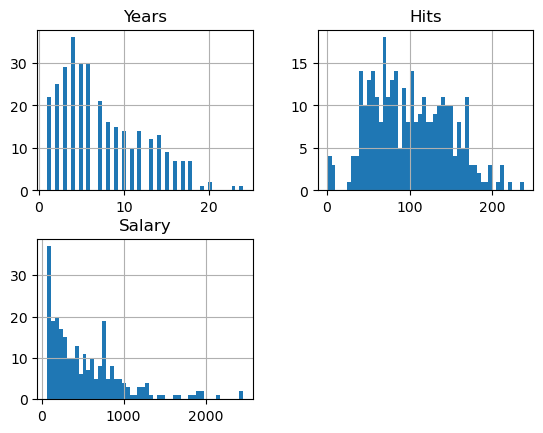

In [70]:
# b)
print("Hitters_small shape:", Hitters_small.shape)
Hitters_small.info()
Hitters_small.describe()
Hitters_small.hist(sharex = False, sharey = False, bins = 50)
Hitters_small = Hitters_small.dropna() 

In [71]:
# c)
X = Hitters_small[['Years', 'Hits']]
y = Hitters_small.Salary
# transformacja zmiennej y
y = np.log(y)

In [72]:
# d)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

##### 1.2 Model drzewa - zadanie regresji


#### *Jak się buduje drzewa?*
1. Dzielimy przestrzeń $X = (X_1, X_2, \dots, X_p)$ na $J$ regionów $R_1, R_2, \dots, R_J$.
2. Predykcja w $j$-ty regionie jest równa średniej z wartości obserwacji $y$ zbioru treningowego w regione $R_J$. 

In [73]:
Tree = tree.DecisionTreeRegressor(max_leaf_nodes=3)
Tree = Tree.fit(X_train, y_train)

Rysunek drzewa

[Text(0.4, 0.8333333333333334, 'Years <= 5.5\nsquared_error = 0.803\nsamples = 131\nvalue = 5.962'),
 Text(0.2, 0.5, 'squared_error = 0.556\nsamples = 59\nvalue = 5.325'),
 Text(0.6, 0.5, 'Hits <= 111.0\nsquared_error = 0.4\nsamples = 72\nvalue = 6.484'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.263\nsamples = 30\nvalue = 6.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.31\nsamples = 42\nvalue = 6.763')]

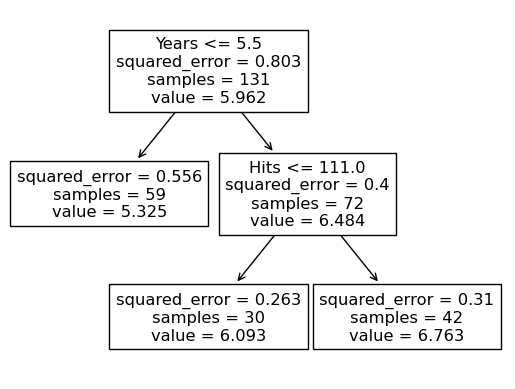

In [74]:
tree.plot_tree(Tree, feature_names=list(X_train.columns))

Przejrzysty zapis otrzymanego drzewa

In [75]:
from sklearn.tree import export_text
t = export_text(Tree)
print(t)

|--- feature_0 <= 5.50
|   |--- value: [5.32]
|--- feature_0 >  5.50
|   |--- feature_1 <= 111.00
|   |   |--- value: [6.09]
|   |--- feature_1 >  111.00
|   |   |--- value: [6.76]



#### *Zadanie 3*
-------------------
Na podstawie informacji o utworzonym drzewie zdefiniuj regiony $R_1, R_2, R_3$.

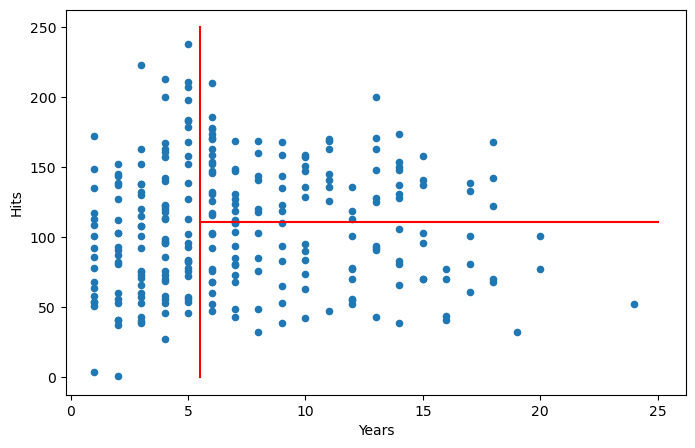

In [76]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5))
Hitters_small.plot(x='Years', y='Hits', kind='scatter', ax=ax)
ax.plot(np.repeat(5.5, 2), np.array([0, 250]), color="red")
ax.plot(np.array([5.5, 25]), np.repeat(111, 2), color="red")



##### *Zadanie 4*
-------------------


Na bazie przedstawionych poniżej regionów narysuj odpowiadające im drzewo decyzyjne.

<img src="Regions_Task.png" alt="drawing" width="400"/>


#### Jak konstruować regiony w przypadku drzewa dla zadania regresji?
**Cel**: Znaleźć $R_1, R_2, \dots, R_J$, które minimalizują $RSS$.

$$RSS = \sum_{j = 1}^{J} \sum_{i \in R_j}^{}(y_i - \hat{y}_{R_j})^2$$

Niestety nie jesteśmy w stanie rozpatrzeć wszystkich możliwości - zbyt złożone obliczeniowo.

Używamy podejścia *top-down, greedy*:
- *top-down* - zaczynamy od wszystkich obserwacji w jednym regione i następnie w kolejnych krokach rozdzielamy na mniejsze regiony
- *greedy* - na każdym etapie procesu budowania drzewa dokonywany jest najlepszy podział, nie patrzymy w przyszłość

Proces powatrzamy do momentu spełnienia kryterium stopu, np. w liściu nie może być mniej niż 5 obserwacji.



#### 1.3 Predykcja

Dla $R_1, R_2, R_3$: 

In [77]:
print('R1:', np.exp(5.325)*1000)
print('R2:', np.exp(6.093)*1000)
print('R3:', np.exp(6.763)*1000)


R1: 205408.36046478315
R2: 442747.6637636458
R3: 865234.0081512888


In [78]:
y_pred_test = Tree.predict(X_test)

#### 1.4 Jak dobry jest nasz model (zadanie regresji)?

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2$,

gdzie:

$y_i$ - wartość prawdziwa dla $i$-tej obserwacji,

$\hat{f}(x_i)$ jest predykcją modelu dla $i$-tej obserwacji.


In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

0.4878700540640412

Ocena graficzna

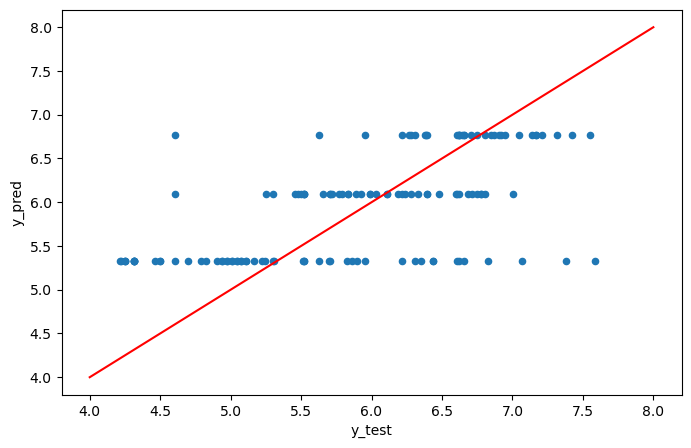

In [80]:
fig, ax = plt.subplots(figsize=(8,5))
df = pd.DataFrame({'y_test':y_test, 'y_pred':Tree.predict(X_test)})
df.plot(x='y_test', y='y_pred', kind='scatter', ax=ax)
ax.plot(np.array([4, 8]), np.array([4, 8]), color='red')

#### 1.5 Wpływ parametrów na jakość modelu

#### *Zadanie 5*
-------------------

Przeprowadź eksperyment pokazujący wartość miary MSE na zbiorze treningowym i testowym w zależności od wartości parametru `max_leaf_nodes` - zakres 2:30.

`max_leaf_nodes` - Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes (default=None).

Narysuj wykres przedstawiający wyniki eksperymantu. Jaka jest optymalna wartość parametru `max_leaf_nodes`?

In [81]:
mse_train = []
mse_test = []

for i in range(2,30):
    Tree_i = tree.DecisionTreeRegressor(max_leaf_nodes = i)
    Tree_i = Tree_i.fit(X_train, y_train)
    y_pred_train = Tree_i.predict(X_train)
    y_pred_test = Tree_i.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))    

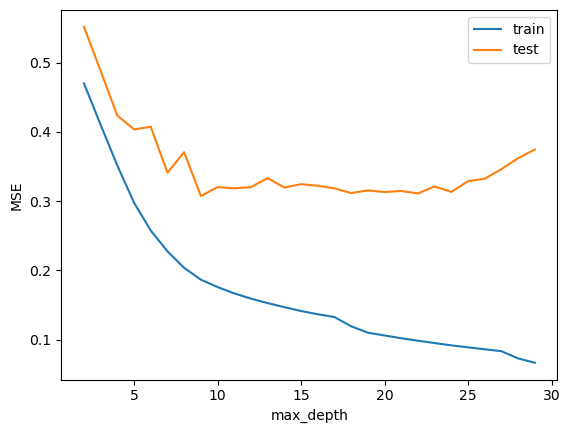

In [82]:
plt.plot(range(2,30), mse_train, label = "train")
plt.plot(range(2,30), mse_test, label = "test")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.legend()